# Jigsaw Toxic Multilabel Comment Classification (2018)
> Built a multi-label toxic comments sentiment analysis model using Fastai2

**Dataset Link:** https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge/overview

In [1]:
# imports
from fastai2.text.all import *

import warnings
warnings.filterwarnings('ignore')

### Dataset Download

In [2]:
%cd ~/Desktop/datasets
dataset = 'jigsaw-toxic-comment-classification-challenge'
# !mkdir {dataset}
%cd {dataset}
# !kaggle competitions download -c {dataset}

/home/harish3110/Desktop/datasets
/home/harish3110/Desktop/datasets/jigsaw-toxic-comment-classification-challenge


In [3]:
# !ls
# !unzip {dataset + '.zip'}

In [4]:
# !rm {dataset + '.zip'} 

### Basic EDA

In [5]:
%cd ~/Desktop/datasets/jigsaw-toxic-comment-classification-challenge
!ls

/home/harish3110/Desktop/datasets/jigsaw-toxic-comment-classification-challenge
models	sample_submission.csv  test.csv  test_labels.csv  train.csv


In [49]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
test_labels = pd.read_csv('test_labels.csv')

In [7]:
train.head() 

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",0,0,0,0,0,0
1,000103f0d9cfb60f,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)",0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of """"types of accidents"""" -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\n\nThere appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It's listed in the relevant form eg Wikipedia:Good_ar...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember what page that's on?",0,0,0,0,0,0


In [8]:
test.head()

,id,comment_text
0,00001cee341fdb12,"Yo bitch Ja Rule is more succesful then you'll ever be whats up with you and hating you sad mofuckas...i should bitch slap ur pethedic white faces and get you to kiss my ass you guys sicken me. Ja rule is about pride in da music man. dont diss that shit on him. and nothin is wrong bein like tupac he was a brother too...fuckin white boys get things right next time.,"
1,0000247867823ef7,"== From RfC == \n\n The title is fine as it is, IMO."
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lapland — / """
3,00017563c3f7919a,":If you have a look back at the source, the information I updated was the correct form. I can only guess the source hadn't updated. I shall update the information once again but thank you for your message."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [9]:
print(len(train))
print(len(test))

159571
153164


### Creating datsets for fine-tuning and classification 

For fine-tuning the language model we can employ this trick of taking all the data i.e. `comment_texts` we have at our disposal. Thus we can even consider test file here since the labels aren't required

In [27]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",0,0,0,0,0,0
1,000103f0d9cfb60f,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)",0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of """"types of accidents"""" -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\n\nThere appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It's listed in the relevant form eg Wikipedia:Good_ar...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember what page that's on?",0,0,0,0,0,0


In [10]:
# Considering only text and toxic columns in train

df_train = train[['comment_text']].copy()
df_train.head()

,comment_text
0,"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"
1,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)"
2,"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info."
3,"""\nMore\nI can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of """"types of accidents"""" -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\n\nThere appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It's listed in the relevant form eg Wikipedia:Good_ar..."
4,"You, sir, are my hero. Any chance you remember what page that's on?"


In [28]:
test.head()

,id,comment_text
0,00001cee341fdb12,"Yo bitch Ja Rule is more succesful then you'll ever be whats up with you and hating you sad mofuckas...i should bitch slap ur pethedic white faces and get you to kiss my ass you guys sicken me. Ja rule is about pride in da music man. dont diss that shit on him. and nothin is wrong bein like tupac he was a brother too...fuckin white boys get things right next time.,"
1,0000247867823ef7,"== From RfC == \n\n The title is fine as it is, IMO."
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lapland — / """
3,00017563c3f7919a,":If you have a look back at the source, the information I updated was the correct form. I can only guess the source hadn't updated. I shall update the information once again but thank you for your message."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [11]:
df_test = test[['comment_text']].copy()
df_test.head()

,comment_text
0,"Yo bitch Ja Rule is more succesful then you'll ever be whats up with you and hating you sad mofuckas...i should bitch slap ur pethedic white faces and get you to kiss my ass you guys sicken me. Ja rule is about pride in da music man. dont diss that shit on him. and nothin is wrong bein like tupac he was a brother too...fuckin white boys get things right next time.,"
1,"== From RfC == \n\n The title is fine as it is, IMO."
2,""" \n\n == Sources == \n\n * Zawe Ashton on Lapland — / """
3,":If you have a look back at the source, the information I updated was the correct form. I can only guess the source hadn't updated. I shall update the information once again but thank you for your message."
4,I don't anonymously edit articles at all.


In [12]:
df_lm = pd.concat([df_train, df_test])
df_lm.head()

,comment_text
0,"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"
1,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)"
2,"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info."
3,"""\nMore\nI can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of """"types of accidents"""" -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\n\nThere appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It's listed in the relevant form eg Wikipedia:Good_ar..."
4,"You, sir, are my hero. Any chance you remember what page that's on?"


In [13]:
print(len(df_train))
print(len(df_test))
print(len(df_lm))

159571
153164
312735


### Creating Dataloader

Creating a dataloader for self-supervised learning task which tries to predict the next word in a sequence as represented by `text_` below. 

Fastai handles text processing steps like tokenization and numericalization internally when `TextBlock` is passed to `DataBlock`

In [14]:
blocks = (TextBlock.from_df(text_cols='comment_text', is_lm=True, res_col_name='text'))

In [15]:
dls_lm = DataBlock(
    blocks = blocks,
    get_x = ColReader('text'), 
    splitter = RandomSplitter(0.1, seed=42) # using only 10% of entire comments data for validation inorder to learn more
)

In [16]:
dls_lm = dls_lm.dataloaders(df_lm, bs=64)

# select bs mostly based on how much your GPU can handle without running out of memory

In [17]:
dls_lm.show_batch(max_n=3)

,text,text_
0,"xxbos xxmaj it 's a good question . xxmaj i 've kind of gone back and forth on it over the years , but xxmaj i 've been finding lately that when xxmaj i 've been updating licensees as a result of an acquisition , xxmaj i 've been linking the licensees to the owner 's page more often ( or at least when i remember to do so ) . xxmaj","xxmaj it 's a good question . xxmaj i 've kind of gone back and forth on it over the years , but xxmaj i 've been finding lately that when xxmaj i 've been updating licensees as a result of an acquisition , xxmaj i 've been linking the licensees to the owner 's page more often ( or at least when i remember to do so ) . xxmaj in"
1,xxup fack xxup you xxup fack xxup you \n▁ xxup fack xxup you xxup fack xxup you xxup fack xxup you xxup fack xxup you xxup fack xxup you xxup fack xxup you xxup fack xxup you xxup fack xxup you \n▁ xxup fack xxup you xxup fack xxup you xxup fack xxup you xxup fack xxup you xxup fack xxup you xxup fack xxup you xxup fack xxup you xxup fack,fack xxup you xxup fack xxup you \n▁ xxup fack xxup you xxup fack xxup you xxup fack xxup you xxup fack xxup you xxup fack xxup you xxup fack xxup you xxup fack xxup you xxup fack xxup you \n▁ xxup fack xxup you xxup fack xxup you xxup fack xxup you xxup fack xxup you xxup fack xxup you xxup fack xxup you xxup fack xxup you xxup fack xxup
2,"v and xxup wp : xxunk , i remain committed to a free encyclopedia , free in particular from advertising either in the articles or surrounding them . \n\n xxmaj but we have to deal with the present structure and the present question . xxmaj whatever may have been said elsewhere which i am deliberately not looking xxunk xxmaj himalayan says above makes sense to me : it is a combination of","and xxup wp : xxunk , i remain committed to a free encyclopedia , free in particular from advertising either in the articles or surrounding them . \n\n xxmaj but we have to deal with the present structure and the present question . xxmaj whatever may have been said elsewhere which i am deliberately not looking xxunk xxmaj himalayan says above makes sense to me : it is a combination of my"


### Fine-tuning Language Model

Fine-tuning Wikitext 103 based LM to toxic comments dataset using ULMFiT methodologies. This fine-tuned LM can thus be used as the base to classify toxic texts in the next step. 

In [18]:
#fine-tuning wikitext LM to Jigsaw dataset

learn = language_model_learner(dls_lm, AWD_LSTM, metrics=[accuracy, Perplexity()]).to_fp16()

SuggestedLRs(lr_min=0.03019951581954956, lr_steep=0.10000000149011612)

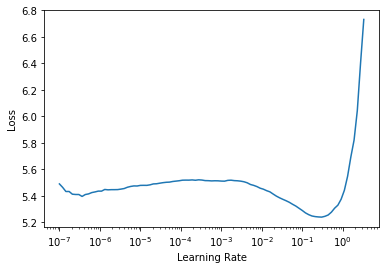

In [28]:
learn.lr_find()

Let's train the last layer of the model using a learning rate of `1e-2` based on the above learning rate finder plot using Leslie Smith's [1 Cycle Training](https://arxiv.org/abs/1708.07120) approach.

In [28]:
learn.fine_tune(10, 4e-3)

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,3.714566,3.496516,0.365180,33.000263,16:04
1,3.604150,3.443364,0.372944,31.292059,16:08
2,3.478880,3.406443,0.378410,30.157772,16:05
3,3.541979,3.382690,0.381952,29.449877,16:15
4,3.423829,3.367516,0.384422,29.006372,16:07
5,3.387651,3.355525,0.386115,28.660641,16:07
6,3.309172,3.343452,0.388299,28.316708,16:07
7,3.297806,3.337287,0.389445,28.142670,16:07
8,3.254500,3.335034,0.389722,28.079348,16:09
9,3.304389,3.335266,0.389804,28.085863,16:07


Once we have fine-tuned out LM to our downstream task, we save the encoder part of the model which is all of our model except the final layer that converts activations to probabilities of picking each token in our vocabulary. 

We can then use this encoder part as our base to build a toxic comment classification model. 

In [29]:
# Saving the encoder
learn.save_encoder('finetuned_toxic_2018')

### Training the classifier

#### Creating the classifier dataloader

Ensure that the sequence length and vocab passed to the `TextBlock` is same as that given while fine-tuning LM 

In [19]:
ys = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate']

In [21]:
blocks = (TextBlock.from_df('comment_text', seq_len=dls_lm.seq_len, vocab=dls_lm.vocab), 
          MultiCategoryBlock(encoded=True, vocab=ys))

In [24]:
dls = DataBlock(blocks=blocks,
                get_x=ColReader('text'),
                get_y=ColReader(ys),
                splitter=RandomSplitter())

In [26]:
# Checking if dls works by calling dls.summary()
dls.summary(train.iloc[:100])

Setting-up type transforms pipelines
0   0000997932d777bf   
1   000103f0d9cfb60f   
2   000113f07ec002fd   
3   0001b41b1c6bb37e   
4   0001d958c54c6e35   
..               ...   
95  003b9f448ee4a29d   
96  003bd094feef5263   
97  003caacc6ce6c9e9   
98  003d77a20601cec1   
99  003dbd1b9b354c1f   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               comment_text  \
0                                                                                          

Setting up Pipeline: ColReader -> EncodedMultiCategorize

Building one sample
  Pipeline: ColReader -> Tokenizer -> Numericalize
    starting from
      id                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      00218d74784ce50b
toxic                                                                                                                                                                                                                                 

Setting up after_item: Pipeline: ToTensor
Setting up before_batch: Pipeline: partial
Setting up after_batch: Pipeline: 

Building one batch
Applying item_tfms to the first sample:
  Pipeline: ToTensor
    starting from
      (TensorText of size 183, TensorMultiCategory([0., 0., 0., 0., 0., 0.]))
    applying ToTensor gives
      (TensorText of size 183, TensorMultiCategory([0., 0., 0., 0., 0., 0.]))

Adding the next 3 samples

Applying before_batch to the list of samples
  Pipeline: partial
    starting from
      [(TensorText of size 183, TensorMultiCategory([0., 0., 0., 0., 0., 0.])), (TensorText of size 180, TensorMultiCategory([0., 0., 0., 0., 0., 0.])), (TensorText of size 63, TensorMultiCategory([0., 0., 0., 0., 0., 0.])), (TensorText([   2,    8, 2271,   44,    8,  112,    8,   14,  191,  338, 4805,   42,
         478,    9,    8,  124,   44]), TensorMultiCategory([0., 0., 0., 0., 0., 0.]))]
    applying partial gives
      [(TensorText of size 183, TensorMultiCategory([0., 0., 

In [29]:
dls = dls.dataloaders(train)

In [30]:
dls.show_batch(max_n=3)

,text,None
0,xxbos i xxup am xxup an xxup loser xxrep 4 = i xxup am xxup an xxup loser = = = = i xxup am xxup an xxup loser xxrep 4 = i xxup am xxup an xxup loser = = = = i xxup am xxup an xxup loser xxrep 4 = i xxup am xxup an xxup loser = = = = i xxup am xxup an xxup loser xxrep 4 = i xxup am xxup an xxup loser = = = = i xxup am xxup an xxup loser xxrep 4 = i xxup am xxup an xxup loser = = = = i xxup am xxup an xxup loser xxrep 4 = i xxup am xxup an xxup loser = = = = i xxup am xxup an xxup loser xxrep 4 = i xxup am xxup an xxup loser = = = = i xxup,toxic
1,xxbos xxup you xxup suck xxup you xxup suck xxup you xxup suck xxup you xxup suck xxup you xxup suck xxup you xxup suck xxup you xxup suck xxup you xxup suck xxup you xxup suck xxup you xxup suck xxup you xxup suck xxup you xxup suck xxup you xxup suck xxup you xxup suck xxup you xxup suck xxup you xxup suck xxup you xxup suck xxup you xxup suck xxup you xxup suck xxup you xxup suck xxup you xxup suck xxup you xxup suck xxup you xxup suck xxup you xxup suck xxup you xxup suck xxup you xxup suck xxup you xxup suck xxup you xxup suck xxup you xxup suck xxup you xxup suck xxup you xxup suck xxup you xxup suck xxup you xxup suck xxup you xxup suck xxup you xxup suck xxup you xxup suck xxup you xxup suck xxup,toxic;severe_toxic;obscene;insult
2,xxbos xxup fuck o xxrep 3 f xxup uck o xxrep 3 f xxup uck o xxrep 3 f xxup uck o xxrep 3 f xxup uck o xxrep 3 f xxup uck o xxrep 3 f xxup uck o xxrep 3 f xxup uck o xxrep 3 f xxup uck o xxrep 3 f xxup uck o xxrep 3 f xxup uck o xxrep 3 f xxup uck o xxrep 3 f xxup uck o xxrep 3 f xxup uck o xxrep 3 f xxup uck o xxrep 3 f xxup uck o xxrep 3 f xxup uck o xxrep 3 f xxup uck o xxrep 3 f xxup uck o xxrep 3 f xxup uck o xxrep 3 f xxup uck o xxrep 3 f xxup uck o xxrep 3 f xxup uck o xxrep 3 f xxup uck o xxrep 3 f xxup uck o xxrep 3,toxic;severe_toxic;obscene


In [30]:
len(dls.train_ds), len(dls.valid_ds)

(111700, 47871)

#### Defining the learner

Since this is a multilabel classification problem we need to use the `BCEWithLogitsLossFlat` loss function with a specific multilabel metric in the form of `accuracy_multi` which is used in Fastai

In [31]:
loss_func = BCEWithLogitsLossFlat(thresh=0.8)
metrics = [partial(accuracy_multi, thresh=0.8)]

In [32]:
learn = text_classifier_learner(dls, AWD_LSTM, metrics=metrics, loss_func=loss_func).to_fp16()
learn.load_encoder('finetuned_toxic_2018')

In [33]:
learn.model

SequentialRNN(
  (0): SentenceEncoder(
    (module): AWD_LSTM(
      (encoder): Embedding(60008, 400, padding_idx=1)
      (encoder_dp): EmbeddingDropout(
        (emb): Embedding(60008, 400, padding_idx=1)
      )
      (rnns): ModuleList(
        (0): WeightDropout(
          (module): LSTM(400, 1152, batch_first=True)
        )
        (1): WeightDropout(
          (module): LSTM(1152, 1152, batch_first=True)
        )
        (2): WeightDropout(
          (module): LSTM(1152, 400, batch_first=True)
        )
      )
      (input_dp): RNNDropout()
      (hidden_dps): ModuleList(
        (0): RNNDropout()
        (1): RNNDropout()
        (2): RNNDropout()
      )
    )
  )
  (1): PoolingLinearClassifier(
    (layers): Sequential(
      (0): LinBnDrop(
        (0): BatchNorm1d(1200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (1): Dropout(p=0.2, inplace=False)
        (2): Linear(in_features=1200, out_features=50, bias=False)
        (3): ReLU(inplace=True

#### Training

SuggestedLRs(lr_min=0.03630780577659607, lr_steep=0.0831763744354248)

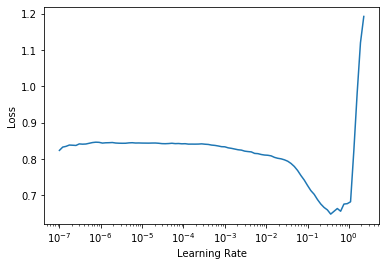

In [34]:
learn.lr_find()

In [35]:
lr = 1e-2
moms = (0.8,0.7, 0.8)
lr *= learn.dls.bs/128

In [36]:
learn.fit_one_cycle(1, lr, moms=moms, wd=0.1)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.170123,0.070702,0.973152,01:10


In [37]:
learn.freeze_to(-2)
lr /= 2
learn.fit_one_cycle(1, slice(lr/(2.6**4), lr), moms=moms, wd=0.1)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.063649,0.055597,0.976698,01:25


In [39]:
learn.freeze_to(-3)
lr /=2
learn.fit_one_cycle(1, slice(lr/(2.6**4), lr), moms=moms, wd=0.1)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.051740,0.046392,0.979121,01:56


In [40]:
learn.unfreeze()
lr /= 5
learn.fit_one_cycle(2, slice(lr/(2.6**4),lr), moms=(0.8,0.7,0.8), wd=0.1)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.046093,0.045034,0.979795,02:43
1,0.046457,0.044964,0.980463,02:35


In [41]:
learn.save('toxic_classifier_final_2018')

### Creating the Kaggle Submission File

In [57]:
sub = pd.read_csv('sample_submission.csv')
sub.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.5,0.5,0.5,0.5,0.5,0.5
1,0000247867823ef7,0.5,0.5,0.5,0.5,0.5,0.5
2,00013b17ad220c46,0.5,0.5,0.5,0.5,0.5,0.5
3,00017563c3f7919a,0.5,0.5,0.5,0.5,0.5,0.5
4,00017695ad8997eb,0.5,0.5,0.5,0.5,0.5,0.5


In [60]:
dl = learn.dls.test_dl(df_test['comment_text'])

In [61]:
preds = learn.get_preds(dl=dl)

In [62]:
preds[0][0].cpu().numpy()

array([0.9800913 , 0.34125313, 0.9554855 , 0.10447732, 0.91367656,
       0.7412996 ], dtype=float32)

In [63]:
sub[ys] = preds[0]

In [64]:
sub.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.980091,0.341253,0.955486,0.104477,0.913677,0.741300
1,0000247867823ef7,0.001537,0.000118,0.001250,0.000144,0.000347,0.000225
2,00013b17ad220c46,0.000779,0.000027,0.000383,0.000031,0.000245,0.000100
3,00017563c3f7919a,0.000155,0.000014,0.000085,0.000062,0.000070,0.000026
4,00017695ad8997eb,0.014392,0.000196,0.003235,0.000263,0.001107,0.000505


In [66]:
sub.to_csv('~/Desktop/my_fastai_notebooks/Text/submission.csv', index=False)

The above submission acheived a score of 0.97669 on the competition leaderboard. 

---
---